In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
tt=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Fresh Start\tt.csv')
submission=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Fresh Start\submission_sarima_c1.csv')

In [3]:
tt.query(f"category=={131} & merchant_id == '{'merchant_28905'}'")[['date', 'net_payment_count']].set_index('date').iloc[-3:]

,net_payment_count
date,
2023-10-01,NaN
2023-11-01,NaN
2023-12-01,NaN


In [53]:
start_val_index=tt.query(f"category=={131} & merchant_id == '{'merchant_10000'}'")[['date', 'net_payment_count']].reset_index(drop=True).shape[0]-6
end_val_index=tt.query(f"category=={245} & merchant_id == '{'merchant_10000'}'")[['date', 'net_payment_count']].reset_index(drop=True).shape[0]-4

8

In [57]:
end_val_index=tt.query(f"category=={245} & merchant_id == '{'merchant_10000'}'")[['date', 'net_payment_count']].reset_index(drop=True).shape[0]-4

10

In [54]:
tt.query(f"category=={245} & merchant_id == '{'merchant_10000'}'")[['date', 'net_payment_count']].reset_index(drop=True)

,date,net_payment_count
0,2022-05-01,3.0
1,2022-06-01,4.0
2,2022-12-01,10.0
3,2023-01-01,6.0
4,2023-02-01,4.0
5,2023-03-01,4.0
6,2023-04-01,4.0
7,2023-05-01,6.0
8,2023-06-01,4.0
9,2023-08-01,3.0


In [69]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

class TimeSeriesPipeline:
    def __init__(self, data, merchant_id, category):
        self.data = data
        self.merchant_id = merchant_id
        self.category = category
        self.model = None
        self.i=0

    def preprocess_data(self):
        self.data = self.data.query(f"category=={self.category} & merchant_id == '{self.merchant_id}'")[['date', 'net_payment_count']]
        self.data.set_index('date', inplace=True)
        return self.data

    def check_stationarity_and_transform(self):
        result = adfuller(self.data.dropna()['net_payment_count'])
        self.data_column = 'net_payment_count'
        if result[1] < 0.05:
            print('This time series data doesnt need differencing')
            self.n_dif = 0
        while (result[1] > 0.05) & (self.i <= 13):
            # Applying differencing if data is non-stationary
            self.data['net_payment_count_diff'] = self.data['net_payment_count'] - self.data['net_payment_count'].shift(self.i)
            result = adfuller(self.data.dropna()['net_payment_count_diff'])
            self.n_dif = 1
            self.i += 1

        if result[1] > 0.05:
            print('This time series data need more than 1 differencing')
            self.n_dif = 2

    def fit_model(self):
        # Adjust model parameters as needed
        self.model = SARIMAX(self.data[self.data_column], order=(self.n_dif, 1, 1), seasonal_order=(self.n_dif, 1, 1,12))
        self.model = self.model.fit()

            
    def plot_test(self):
    self.data['forecast'] = self.model.predict()
    start_val_index = self.data.reset_index(drop=True).shape[0] - 6
    end_val_index = self.data.reset_index(drop=True).shape[0] - 4
    self.data[['net_payment_count', 'forecast']].iloc[start_val_index:end_val_index].plot(figsize=(12, 8))

    def forecast(self, months_future):
        start_forecast_index = self.data.reset_index(drop=True).shape[0] - 2
        end_forecast_index = self.data.reset_index(drop=True).shape[0]
        forecast = self.model.predict(start=start_forecast_index, end=end_forecast_index)
        return forecast.tail(months_future)


    def run(self,months_future):
        self.preprocess_data()
        self.check_stationarity_and_transform()
        self.fit_model()
        self.plot_test()
        return self.forecast(months_past, months_future)


IndentationError: expected an indented block after function definition on line 44 (1658415854.py, line 45)

In [70]:
# Usage
pipeline = TimeSeriesPipeline(tt, 'merchant_37025', 2)
forecast_values = pipeline.run( months_future=3)

This time series data doesnt need differencing


c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


UndefinedVariableError: name 'category' is not defined

In [63]:
tt.query("category==2 & merchant_id == 'merchant_37025'")

,merchant_id,net_payment_count,date,is_train,category,flag,active_months,lag_1_corrected,lag_2_corrected,lag_3_corrected,rol_3,rol_6,rol_12,mean_payment_count
162639,merchant_37025,2406.0,2020-09-01,True,2,1,37,NaN,NaN,NaN,NaN,NaN,NaN,6559.945946
162640,merchant_37025,7019.0,2020-10-01,True,2,1,37,2406.0,NaN,NaN,NaN,NaN,NaN,6559.945946
162641,merchant_37025,5205.0,2020-11-01,True,2,1,37,7019.0,2406.0,NaN,4876.666667,NaN,NaN,6559.945946
162642,merchant_37025,5337.0,2020-12-01,True,2,1,37,5205.0,7019.0,2406.0,5853.666667,NaN,NaN,6559.945946
162643,merchant_37025,4918.0,2021-01-01,True,2,1,37,5337.0,5205.0,7019.0,5153.333333,NaN,NaN,6559.945946
162644,merchant_37025,6849.0,2021-02-01,True,2,1,37,4918.0,5337.0,5205.0,5701.333333,5289.000000,NaN,6559.945946
162645,merchant_37025,8601.0,2021-03-01,True,2,1,37,6849.0,4918.0,5337.0,6789.333333,6321.500000,NaN,6559.945946
162646,merchant_37025,7358.0,2021-04-01,True,2,1,37,8601.0,6849.0,4918.0,7602.666667,6378.000000,NaN,6559.945946
162647,merchant_37025,4990.0,2021-05-01,True,2,1,37,7358.0,8601.0,6849.0,6983.000000,6342.166667,NaN,6559.945946
162648,merchant_37025,3259.0,2021-06-01,True,2,1,37,4990.0,7358.0,8601.0,5202.333333,5995.833333,NaN,6559.945946


In [64]:
merchant_37025= tt.query("category==2 & merchant_id == 'merchant_37025' ")[['date','net_payment_count']]

In [65]:
merchant_37025=merchant_37025.set_index('date')

In [66]:
merchant_37025=merchant_37025.iloc[:-3]

<Axes: xlabel='date'>

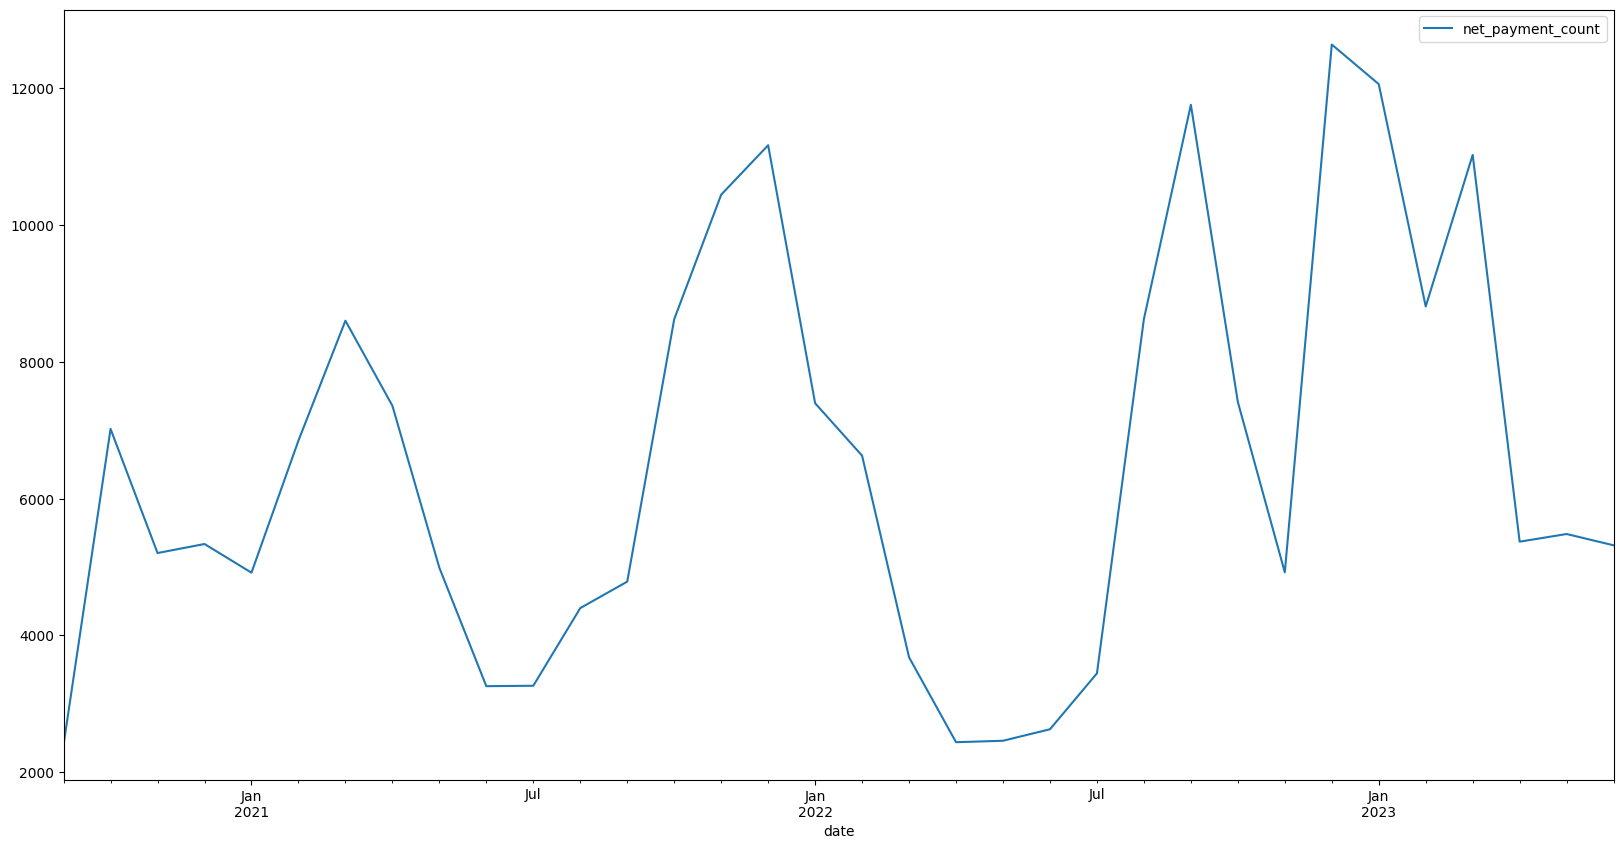

In [67]:
merchant_37025.iloc[:-3].plot(figsize=(20,10))

# Test

In [68]:
from statsmodels.tsa.stattools import adfuller

In [69]:
test_results=adfuller(merchant_37025['net_payment_count'])

In [70]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [71]:
adfuller_test(merchant_37025['net_payment_count'])

ADF Test Statistic : -3.2383723175790045
p-value : 0.017868244578625302
#Lags Used : 0
Number of Observations Used : 36
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [72]:
merchant_37025['Sales First Difference'] = merchant_37025['net_payment_count'] -merchant_37025['net_payment_count'].shift(1)

In [73]:
merchant_37025['Seasonal First Difference'] = merchant_37025['net_payment_count'] -merchant_37025['net_payment_count'].shift(12)

In [74]:
adfuller_test(merchant_37025['Sales First Difference'].dropna())

ADF Test Statistic : -6.054062625264894
p-value : 1.2574238491078084e-07
#Lags Used : 0
Number of Observations Used : 35
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='date'>

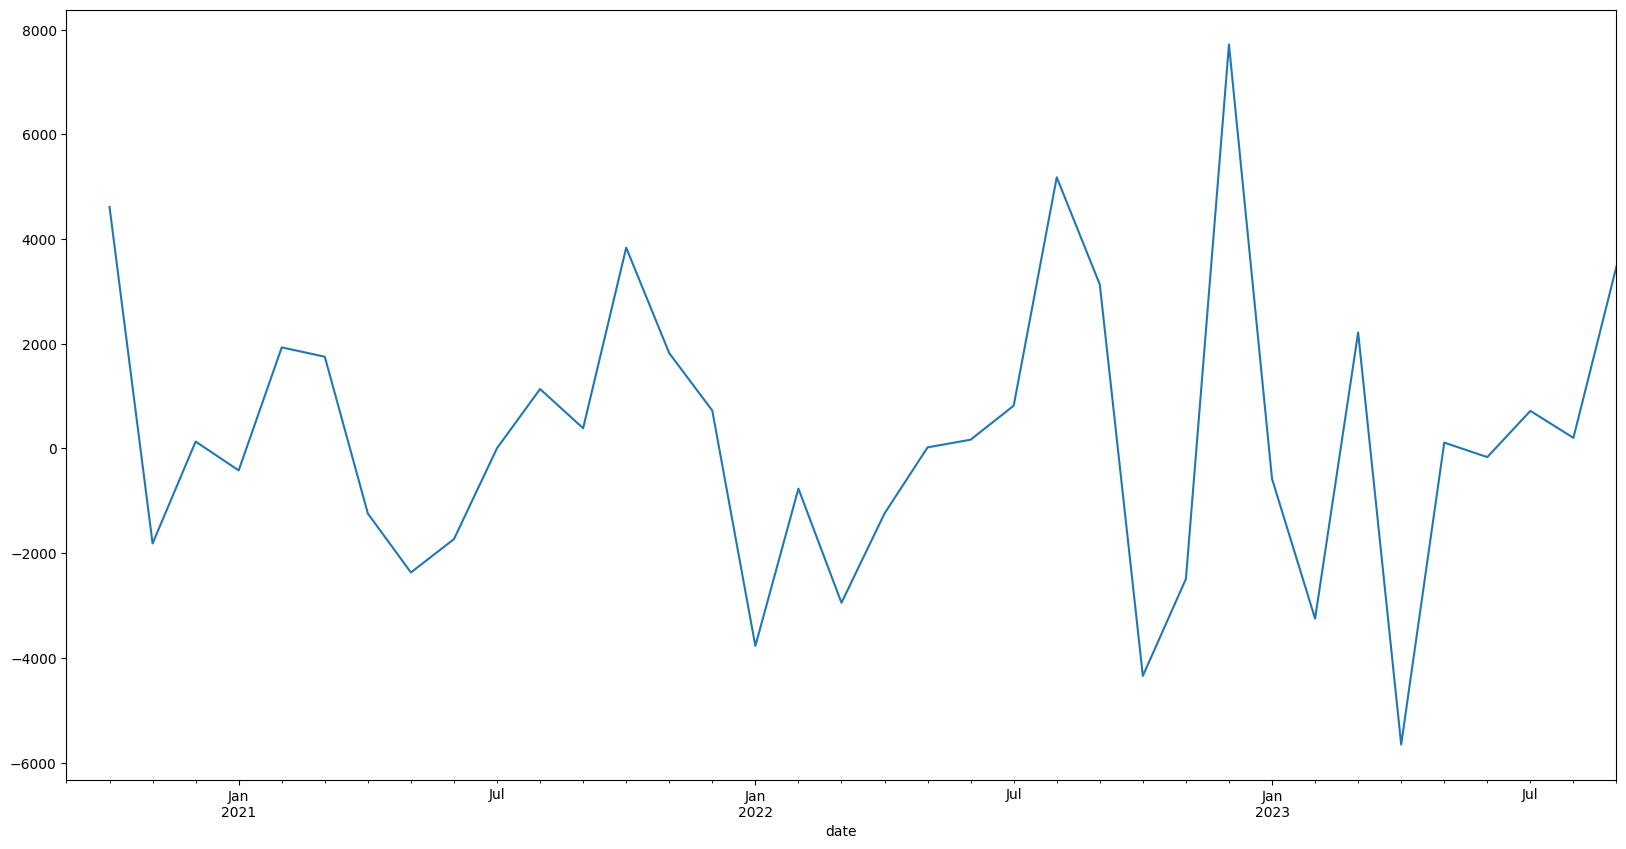

In [75]:
merchant_37025['Sales First Difference'].plot(figsize=(20,10))

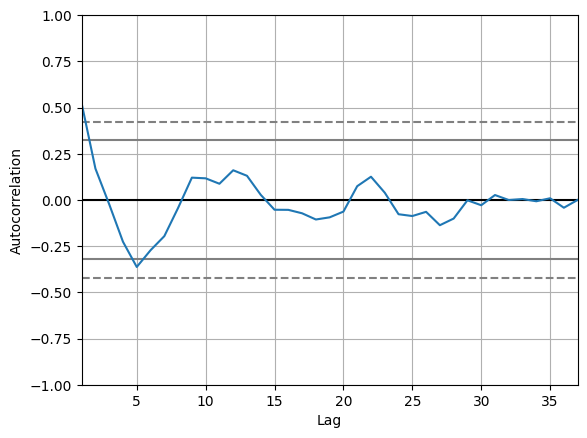

In [76]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(merchant_37025['net_payment_count'])
plt.show()

In [77]:
import statsmodels as sm

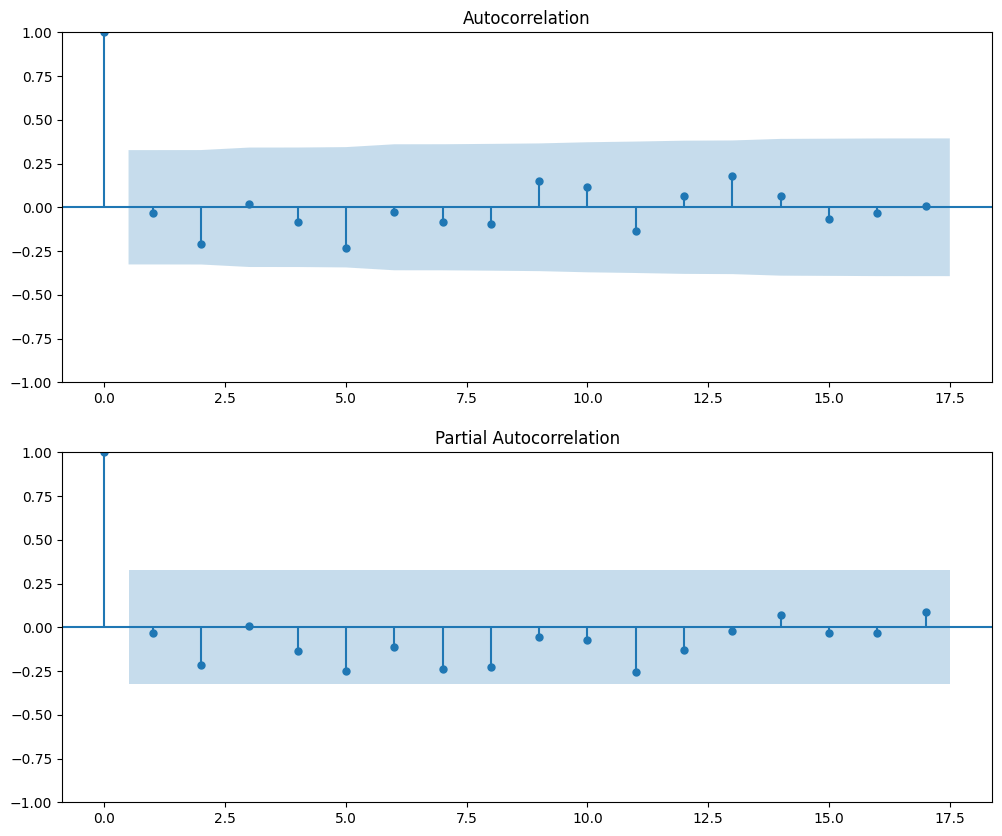

In [78]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(merchant_37025['Sales First Difference'].iloc[1:],lags=17,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(merchant_37025['Sales First Difference'].iloc[1:],lags=17,ax=ax2)

In [79]:
from statsmodels.tsa.arima.model import ARIMA 

In [80]:
model=ARIMA(merchant_37025['net_payment_count'],order=(1,1,1))
model_fit=model.fit()

c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [81]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      net_payment_count   No. Observations:                   37
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -335.686
Date:                Sun, 04 Feb 2024   AIC                            677.372
Time:                        15:16:47   BIC                            682.123
Sample:                    09-01-2020   HQIC                           679.030
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5741      0.867     -0.662      0.508      -2.273       1.124
ma.L1          0.6833      0.793      0.861      0.389      -0.871       2.238
sigma2      7.632e+06   1.64e+06      4.658      0.000    4.42e+06    1.08e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 1.14
Prob(Q):                              0.49   Prob(JB):                         0.57
Heteroskedasticity (H):               3.50   Skew:                             0.34
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
merchant_37025.shape

(37, 3)

<Axes: xlabel='date'>

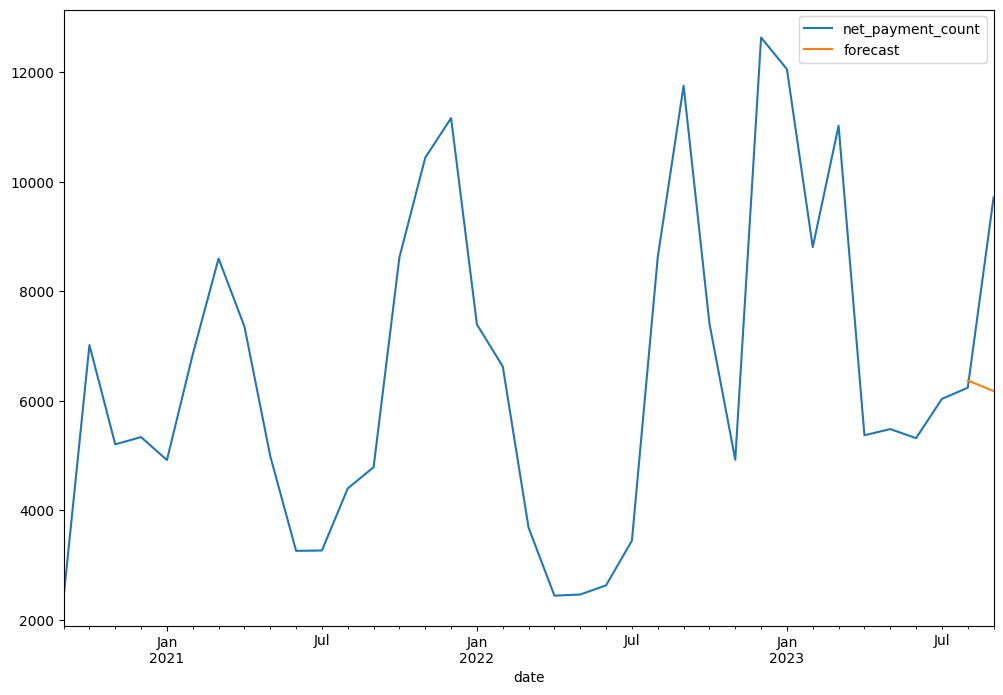

In [83]:
merchant_37025['forecast']=model_fit.predict(start=35,end=37,dynamic=True)
merchant_37025[['net_payment_count','forecast']].plot(figsize=(12,8))

In [84]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(merchant_37025['net_payment_count'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

<Axes: xlabel='date'>

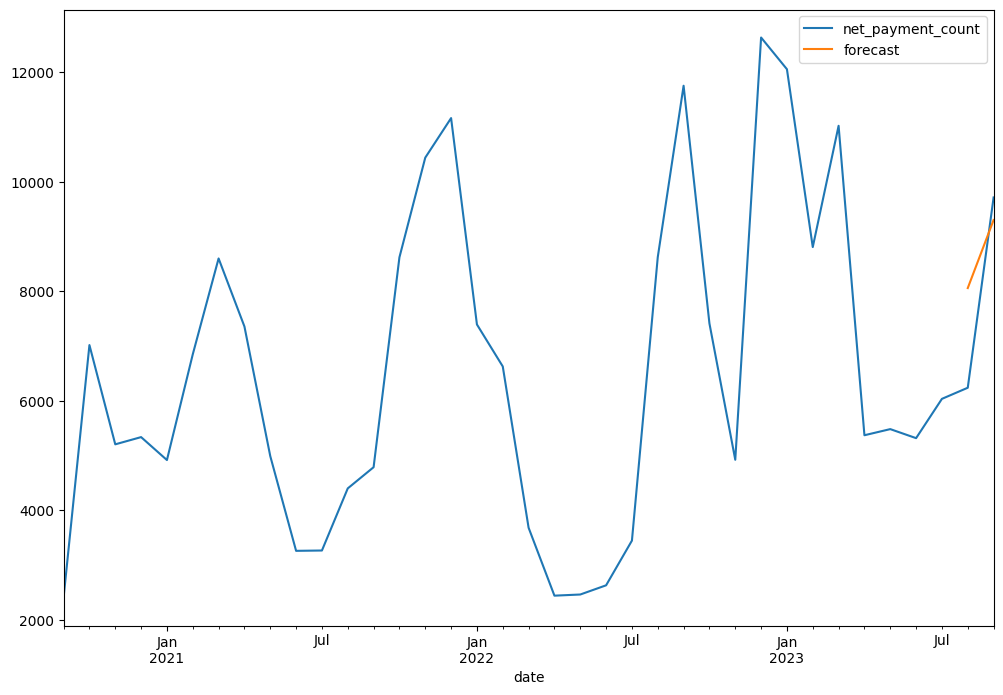

In [85]:
merchant_37025['forecast']=results.predict(start=35,end=37,dynamic=True)
merchant_37025[['net_payment_count','forecast']].plot(figsize=(12,8))

In [86]:
merchant_37025.index[-1]

Timestamp('2023-09-01 00:00:00')

In [87]:
from pandas.tseries.offsets import DateOffset
future_dates=[merchant_37025.index[-1]+ DateOffset(months=x)for x in range(0,4)]

In [88]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=merchant_37025.columns)

In [89]:
future_dates_df.tail()

,net_payment_count,Sales First Difference,Seasonal First Difference,forecast
2023-10-01,NaN,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN,NaN


In [90]:
future_df=pd.concat([merchant_37025,future_dates_df])

In [91]:
future_df

,net_payment_count,Sales First Difference,Seasonal First Difference,forecast
2020-09-01,2406.0,NaN,NaN,NaN
2020-10-01,7019.0,4613.0,NaN,NaN
2020-11-01,5205.0,-1814.0,NaN,NaN
2020-12-01,5337.0,132.0,NaN,NaN
2021-01-01,4918.0,-419.0,NaN,NaN
2021-02-01,6849.0,1931.0,NaN,NaN
2021-03-01,8601.0,1752.0,NaN,NaN
2021-04-01,7358.0,-1243.0,NaN,NaN
2021-05-01,4990.0,-2368.0,NaN,NaN
2021-06-01,3259.0,-1731.0,NaN,NaN


<Axes: >

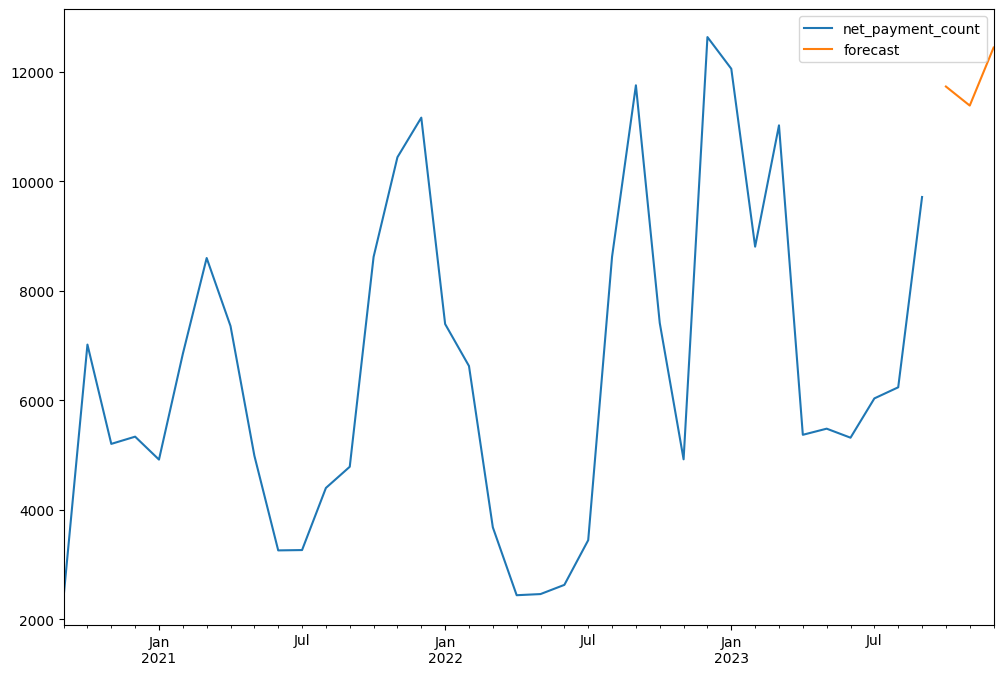

In [92]:
future_df['forecast'] = results.predict(start = 37, end =40, dynamic= True)  
future_df[['net_payment_count', 'forecast']].plot(figsize=(12, 8)) 

In [93]:
future_df

,net_payment_count,Sales First Difference,Seasonal First Difference,forecast
2020-09-01,2406.0,NaN,NaN,NaN
2020-10-01,7019.0,4613.0,NaN,NaN
2020-11-01,5205.0,-1814.0,NaN,NaN
2020-12-01,5337.0,132.0,NaN,NaN
2021-01-01,4918.0,-419.0,NaN,NaN
2021-02-01,6849.0,1931.0,NaN,NaN
2021-03-01,8601.0,1752.0,NaN,NaN
2021-04-01,7358.0,-1243.0,NaN,NaN
2021-05-01,4990.0,-2368.0,NaN,NaN
2021-06-01,3259.0,-1731.0,NaN,NaN


In [96]:
submission=submission.sort_values(['merchant_id','month_id']).reset_index(drop=True)

In [97]:
future_df['forecast'].iloc[-3:].values

array([11734.56718811, 11386.38474966, 12446.59739482])

In [98]:
# Assuming 'submission' is your original DataFrame
merchant_filter = submission['merchant_id'] == 'merchant_6450'
forecast_values = future_df['forecast'].iloc[-3:].values

# Check if the lengths match
if sum(merchant_filter) == len(forecast_values):
    submission.loc[merchant_filter, 'net_payment_count'] = forecast_values
else:
    print("Length mismatch: cannot assign values")


In [99]:
merchant_filter.sum()

3

In [100]:
submission.query("merchant_id=='merchant_6450'")

,id,merchant_id,month_id,net_payment_count
69777,202310merchant_6450,merchant_6450,2023-10-01,11734.567188
69778,202311merchant_6450,merchant_6450,2023-11-01,11386.384750
69779,202312merchant_6450,merchant_6450,2023-12-01,12446.597395


In [ ]:
submission